# MNIST Linear Model

In [2]:
%matplotlib inline
from fastai.basics import *

In [3]:
path = Config().data_path()/'mnist'

In [4]:
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

(50000, 784)

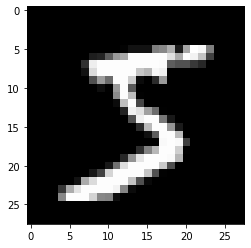

In [5]:
plt.imshow(x_train[0].reshape((28,28)), cmap="gray")
x_train.shape

In [6]:
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train.shape, y_train.min(), y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

In [7]:
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [8]:
x,y = next(iter(data.train_dl))
x.shape, y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [9]:
class MNIST_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10, bias=True)
    
    def forward(self, xb): return self.lin(xb) 

In [10]:
model = MNIST_Logistic()

In [11]:
model

MNIST_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [12]:
model.lin

Linear(in_features=784, out_features=10, bias=True)

In [13]:
model(x).shape

torch.Size([64, 10])

In [14]:
[p.shape for p in model.parameters()]

[torch.Size([10, 784]), torch.Size([10])]

In [15]:
lr=2e-2

In [16]:
loss_func = nn.CrossEntropyLoss()

In [17]:
def update(x,y,lr):
    wd = 1e-5
    y_hat = model(x)
    # weight decay
    w2 = 0.
    for p in model.parameters(): w2 += (p**2).sum()
    # add to regular loss
    loss = loss_func(y_hat, y) + w2*wd
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr * p.grad)
            p.grad.zero_()
    return loss.item()

In [18]:
losses = [update(x,y,lr) for x,y in data.train_dl]


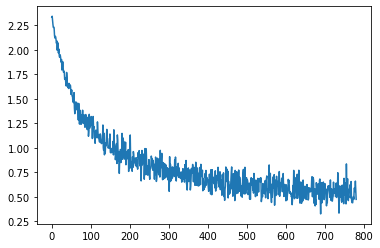

In [19]:
plt.plot(losses);


In [20]:
class MNIST_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 50, bias=True)
        self.lin2 = nn.Linear(50, 10, bias=True)
    def forward(self, xb): 
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x) 

In [22]:
model = MNIST_NN()

In [25]:
losses = [update(x,y,lr) for x,y in data.train_dl]

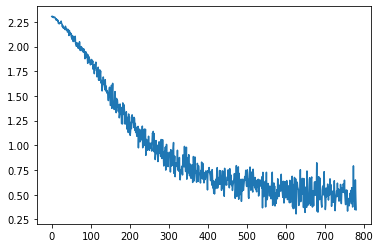

In [26]:
plt.plot(losses);

In [35]:
model = MNIST_NN()


In [36]:
def update(x,y,lr):
    opt = optim.Adam(model.parameters(), lr)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [37]:
loss = [update(x,y,lr) for x,y in data.train_dl]

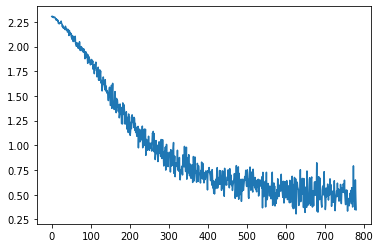

In [38]:
plt.plot(losses);